# Employee churn model 

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
df=pd.read_csv("HR-Employee-Attrition.csv")

In [146]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Data dictionary

In [147]:
df.size

51450

In [148]:
df.shape

(1470, 35)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [150]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


###### checking for null and duplicated values

In [151]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [152]:
df.duplicated().sum()

0

In [153]:
for i in df.columns:
    print(i)

Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [154]:
len(df.query("Over18 == 'N'"))

0

In [155]:
df.drop('Over18',axis=1, inplace=True) # Dropped because the column is not needed,as an indivisual must be over 18 in order to work 

In [156]:
len(df.query("EmployeeCount != 1"))

0

In [157]:
df.drop('EmployeeCount',axis=1, inplace=True) 

In [158]:
df.drop('StandardHours',axis=1, inplace=True) 

In [159]:
df.drop('EmployeeNumber',axis=1, inplace=True) 

In [160]:
print(df['BusinessTravel'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


In [161]:
print(df['Department'].unique())

['Sales' 'Research & Development' 'Human Resources']


In [162]:
l=[df.value_counts(['Department'])]
l

[Department            
 Research & Development    961
 Sales                     446
 Human Resources            63
 dtype: int64]

In [163]:
df.value_counts(['JobRole'])

JobRole                  
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
dtype: int64

# Data visualization

#### Distribution of Attrition

<Axes: xlabel='Attrition', ylabel='count'>

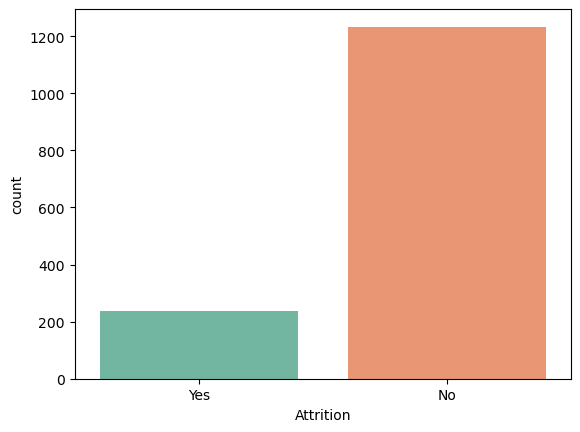

In [164]:
sns.countplot(x="Attrition" , data=df,palette="Set2")

#### Checking the overall rating values given by the employees

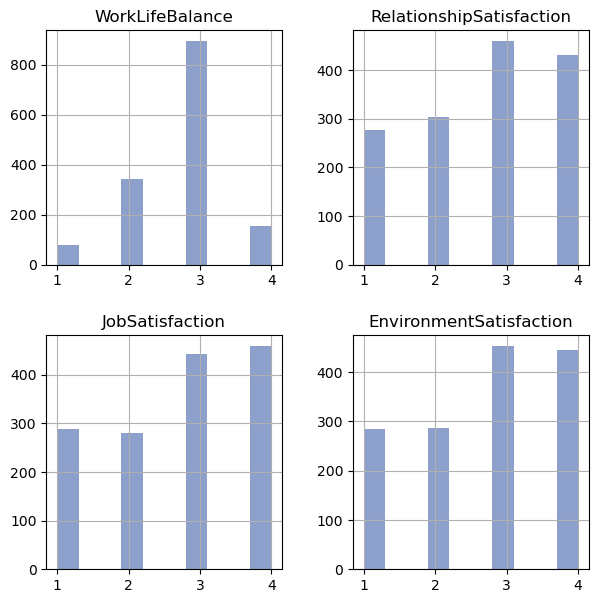

In [165]:
emp_ratings=["WorkLifeBalance",'RelationshipSatisfaction','JobSatisfaction','EnvironmentSatisfaction']Checking the overall rating values given by the employees
df[emp_ratings].hist(figsize=(7,7) ,color='#8da0cb')
plt.show()

#### Gender vs JobSatisfaction

In [166]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [167]:
g_rating = df.groupby("Gender")["JobSatisfaction"].value_counts().to_frame().unstack()

In [168]:
g_r = g_rating.reset_index()

# Rename the columns for clarity
g_r.columns = ['Gender', '1', '2','3','4']

print(g_r)

   Gender    1    2    3    4
0  Female  119  118  181  170
1    Male  170  162  261  289


Rating Distribution for Gender  Female


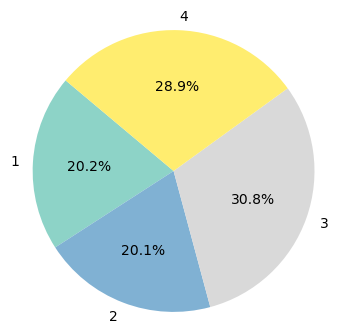

Rating Distribution for Gender  Male


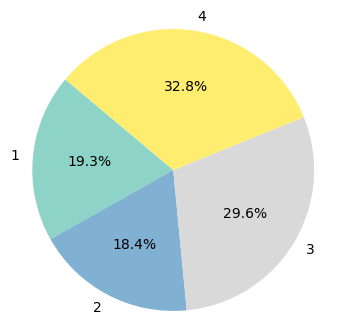

In [169]:
x=g_r['Gender'].tolist()
for i in range(0,2):
    r = g_r.iloc[i, 1:]# Create a pie chart
    plt.figure(figsize=(4, 4))
    plt.pie(r, labels=r.index, autopct='%1.1f%%', startangle=140,colors=color_palette)
    print('Rating Distribution for Gender ',x[i])
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
    plt.show()
    

##### people who have left the company within a year of workin

In [170]:
len(df.query("YearsAtCompany == 0"))

44

In [171]:
len(df.query("(YearsAtCompany == 0) and (Attrition =='Yes')"))

16

#### Attrition by each department

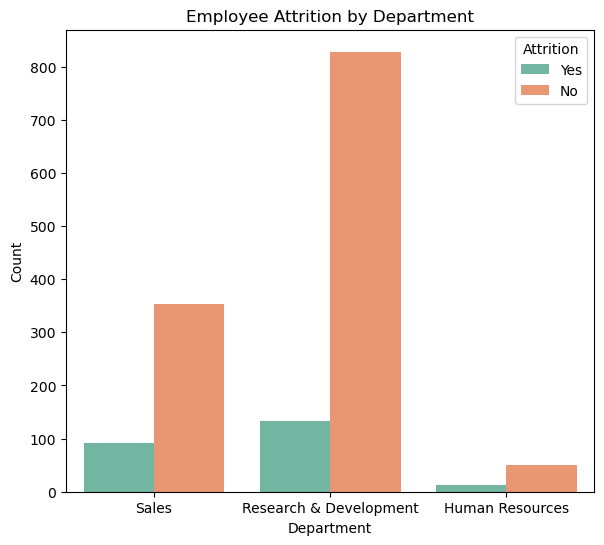

In [172]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Department', hue='Attrition',palette='Set2')
plt.title('Employee Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition')

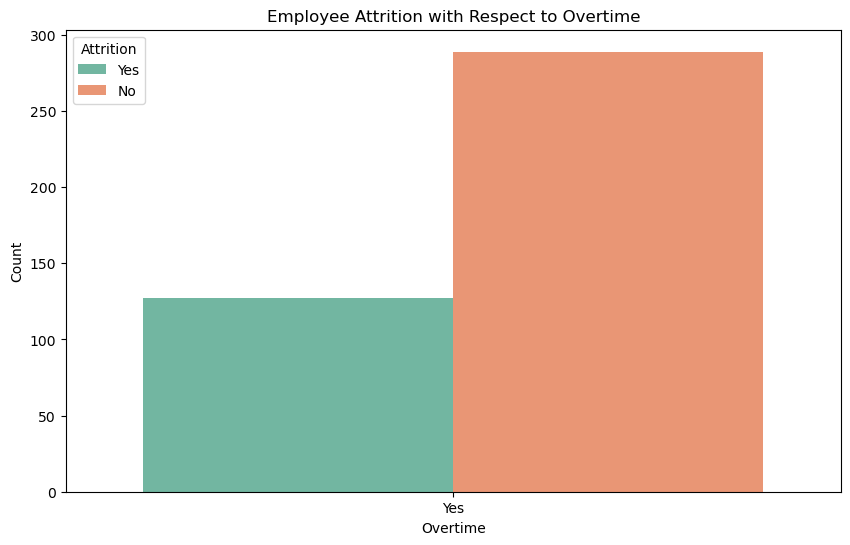

In [173]:
plt.figure(figsize=(10, 6))

# Create a subset of the dataframe where OverTime is "Yes"
overtime_yes = df[df['OverTime'] == 'Yes']

# Create a countplot to visualize attrition with respect to overtime
sns.countplot(data=overtime_yes, x='OverTime', hue='Attrition', palette='Set2')

plt.title('Employee Attrition with Respect to Overtime')
plt.xlabel('Overtime')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()


#### Relation between travel and attrition 

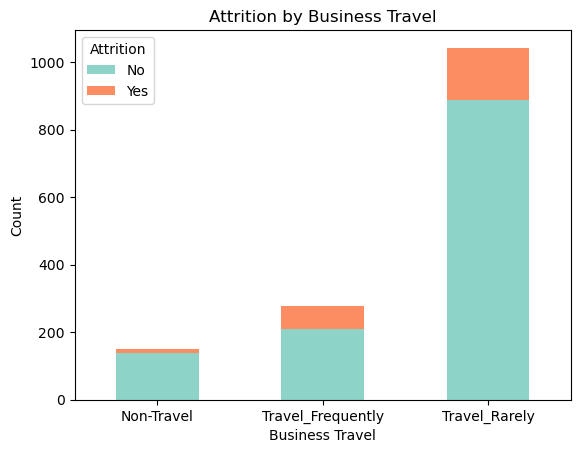

In [174]:

business_travel_ct = pd.crosstab(df['BusinessTravel'], df['Attrition'])
business_travel_ct.plot(kind='bar', stacked=True,color=['#8dd3c7','#fc8d62'])
plt.title('Attrition by Business Travel')
plt.ylabel('Count')
plt.xlabel('Business Travel')
plt.xticks(rotation=0)
plt.legend(title='Attrition')
plt.show()

In [175]:
businessdata = df.groupby("BusinessTravel")["Attrition"].value_counts()

businessdata

BusinessTravel     Attrition
Non-Travel         No           138
                   Yes           12
Travel_Frequently  No           208
                   Yes           69
Travel_Rarely      No           887
                   Yes          156
Name: Attrition, dtype: int64

#### Imbalanced class distribution

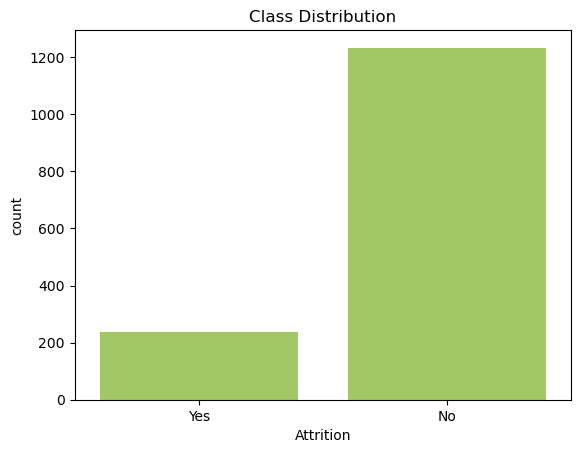

In [176]:
sns.countplot(data=df, x='Attrition',color='#a6d854')
plt.title('Class Distribution')
plt.show()

#### Summary of the categorical variables

In [177]:
df.describe(include="object").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


* Most frequent in this company is a person who travels rarely, from the Research & Development department , educated in Life Sciences , Male, Married, Sales Executive and no OverTime



Text(0.5, 0, 'JobRole')

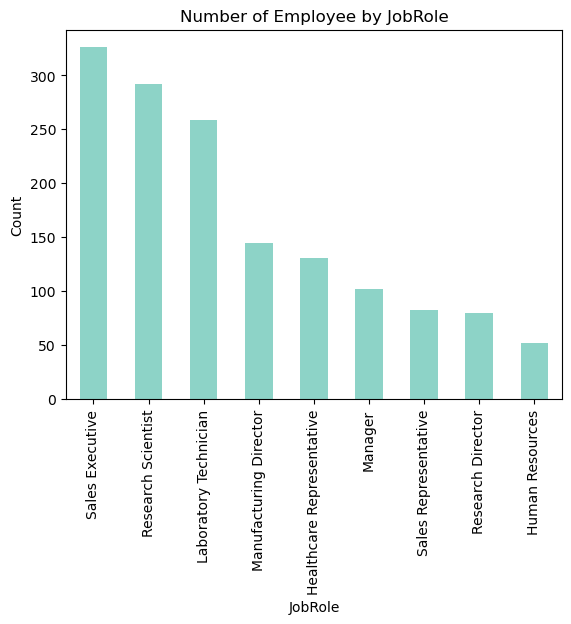

In [178]:
df['JobRole'].value_counts().plot.bar(cmap='Set3')
plt.title('Number of Employee by JobRole')
plt.ylabel('Count')
plt.xlabel('JobRole')



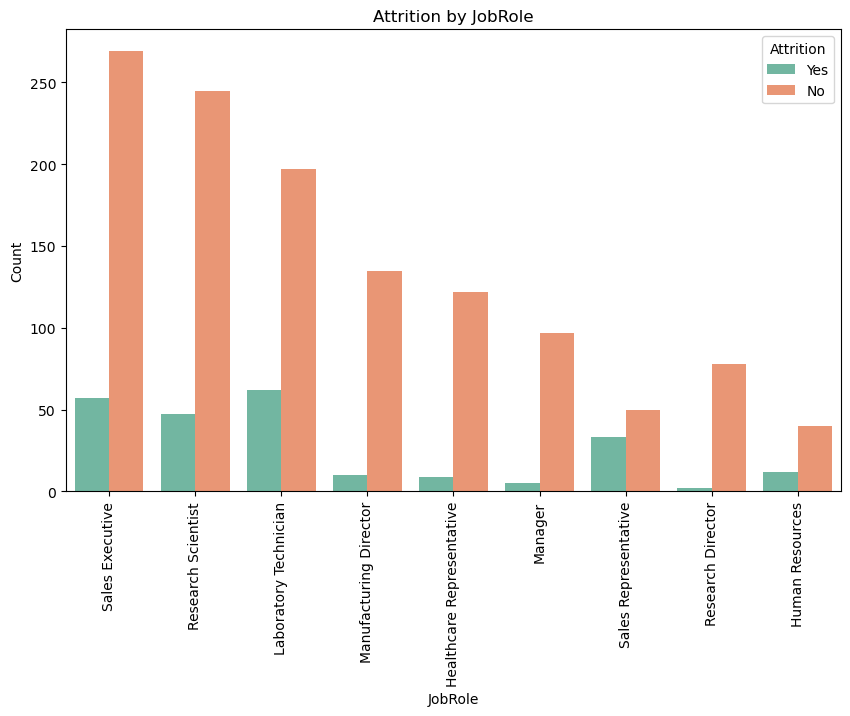

In [179]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='JobRole', hue='Attrition',data=df, palette='Set2')
plt.title('Attrition by JobRole')
plt.xlabel('JobRole')
plt.ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [180]:
attrition = df[df['Attrition'] == 'Yes']
no_attrition = df[df['Attrition']=='No']

<Axes: xlabel='DistanceFromHome', ylabel='Density'>

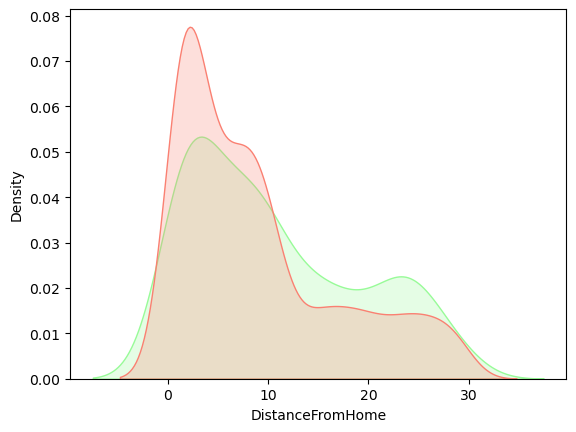

In [181]:
sns.kdeplot(attrition['DistanceFromHome'], label='Employee who left', fill=True, color='palegreen')
sns.kdeplot(no_attrition['DistanceFromHome'], label='Employee who stayes',fill=True, color='salmon')

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

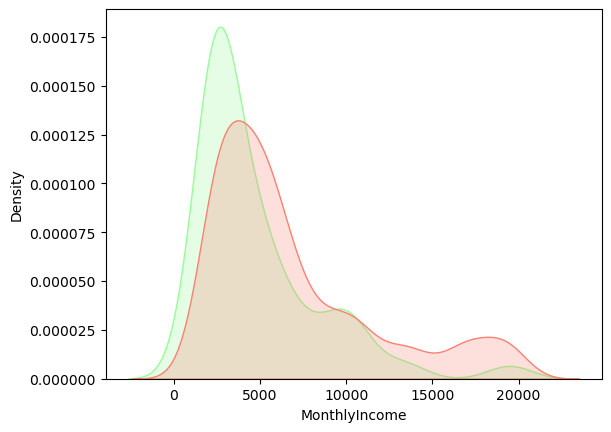

In [182]:
sns.kdeplot(attrition['MonthlyIncome'], label='Employee who left', fill=True, color='palegreen')
sns.kdeplot(no_attrition['MonthlyIncome'], label='Employee who stayes',fill=True, color='salmon')

<Axes: xlabel='Age', ylabel='Density'>

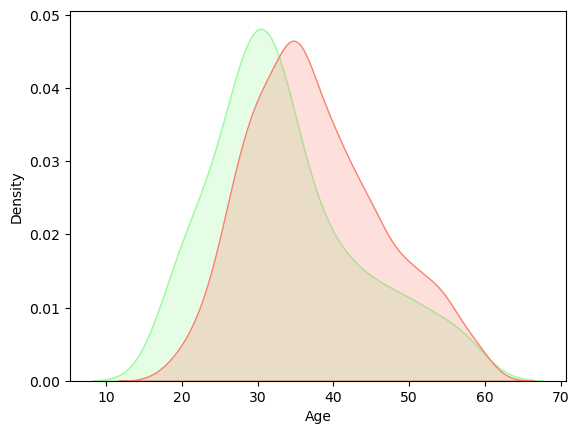

In [183]:
sns.kdeplot(attrition['Age'], label='Employee who left', fill=True, color='palegreen')
sns.kdeplot(no_attrition['Age'], label='Employee who stayes',fill=True, color='salmon')

<Axes: xlabel='YearsAtCompany', ylabel='Density'>

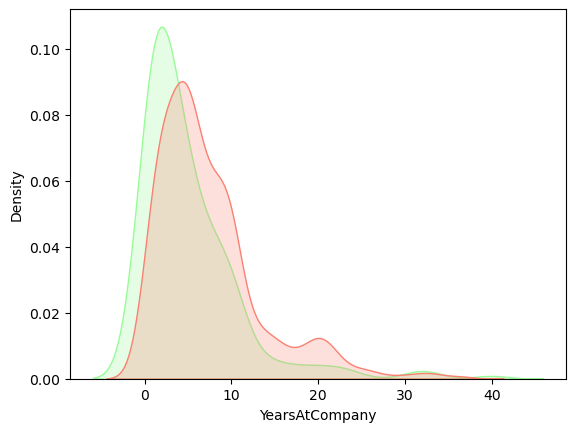

In [184]:
sns.kdeplot(attrition['YearsAtCompany'], label='Employee who left', fill=True, color='palegreen')
sns.kdeplot(no_attrition['YearsAtCompany'], label='Employee who stayes',fill=True, color='salmon')

#### Job Satisfaction per department

In [185]:
ratings = df.groupby("Department")["JobSatisfaction"].value_counts().to_frame().unstack()

In [186]:
ratings

JobSatisfaction               
JobSatisfaction                      1    2    3    4
Department                                           
Human Resources                     11   20   15   17
Research & Development             192  174  300  295
Sales                               86   86  127  147

In [187]:
type(ratings)

pandas.core.frame.DataFrame

In [188]:
ratings_reset = ratings.reset_index()

# Rename the columns for clarity
ratings_reset.columns = ['Department', '1', '2','3','4']

print(ratings_reset)

               Department    1    2    3    4
0         Human Resources   11   20   15   17
1  Research & Development  192  174  300  295
2                   Sales   86   86  127  147


In [189]:
ratings_reset.head(1)

,Department,1,2,3,4
0,Human Resources,11,20,15,17


In [190]:
import plotly.graph_objects as go

In [191]:
num_colors = len(ratings_reset.columns) - 1
color_palette = plt.cm.Set3(np.linspace(0, 1, num_colors))

Rating Distribution for Department  Human Resources


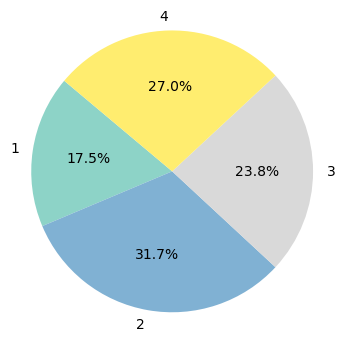

Rating Distribution for Department  Research & Development


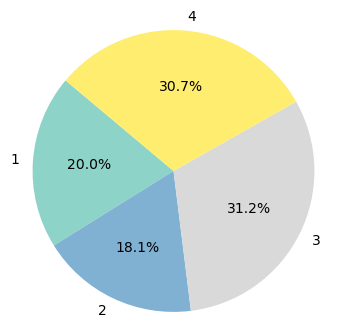

Rating Distribution for Department  Sales


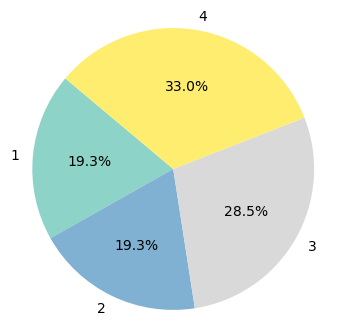

In [192]:

x=ratings_reset['Department'].tolist()
for i in range(0,3):
    ratings = ratings_reset.iloc[i, 1:]# Create a pie chart
    plt.figure(figsize=(4, 4))
    plt.pie(ratings, labels=ratings.index, autopct='%1.1f%%', startangle=140 ,colors=color_palette)
    print('Rating Distribution for Department ',x[i])
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
    plt.show()

In [193]:
dfr=df.query("Department == 'Research & Development'")

In [194]:
len(dfr.query("JobSatisfaction ==1 and Attrition== 'Yes'"))

38

## Encoding

In [195]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [196]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [197]:
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

8 columns were label encoded.


In [198]:
from sklearn.preprocessing import StandardScaler

In [199]:
scaler = StandardScaler()

In [200]:
numerical_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'PercentSalaryHike', 'PerformanceRating', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [201]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1,2,0.742527,2,-1.010909,2,1,2,0,...,-0.426230,1,0,-0.421642,-2.171982,1,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0,1,-1.297775,1,-0.147150,1,1,3,1,...,2.346151,4,1,-0.164511,0.155707,3,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1,2,1.414363,1,-0.887515,2,4,4,1,...,-0.426230,2,0,-0.550208,0.155707,3,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,0,1,1.461466,1,-0.764121,4,1,4,0,...,-0.426230,3,0,-0.421642,0.155707,3,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0,2,-0.524295,1,-0.887515,1,3,1,1,...,-0.426230,4,1,-0.678774,0.155707,3,-0.817734,-0.615492,-0.058285,-0.595227


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   int32  
 2   BusinessTravel            1470 non-null   int32  
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   int32  
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   int32  
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   int32  
 10  HourlyRate                1470 non-null   float64
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   int32  
 14  JobSatis

In [203]:
correlation = df.corr()
print(correlation["Attrition"].sort_values(ascending=False))

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
M

In [204]:
from sklearn.preprocessing import MinMaxScaler

In [205]:
scaler = MinMaxScaler()
scol = list(df.columns)
scol.remove('Attrition')
for col in scol:
    df[col] = df[col].astype(float)
    df[[col]] = scaler.fit_transform(df[[col]])
df['Attrition'] = pd.to_numeric(df['Attrition'], downcast='float')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,1.0,0.715820,1.0,0.000000,0.25,0.2,0.333333,0.0,...,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,0.0,0.5,0.126700,0.5,0.250000,0.00,0.2,0.666667,1.0,...,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,1.0,1.0,0.909807,0.5,0.035714,0.25,0.8,1.000000,1.0,...,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,0.0,0.5,0.923407,0.5,0.071429,0.75,0.2,1.000000,0.0,...,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,0.0,1.0,0.350036,0.5,0.035714,0.00,0.6,0.000000,1.0,...,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


In [206]:
from sklearn.model_selection import train_test_split

### Re Sampling the imbalanced data

In [207]:
from sklearn.utils import resample

In [208]:
df_majority = df[df['Attrition'] == 0.0]
df_minority = df[df['Attrition'] == 1.0]

In [209]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

In [210]:
df_emp = pd.concat([df_majority, df_minority_upsampled])

In [293]:
df_emp["Attrition"].value_counts()

0.0    1233
1.0    1233
Name: Attrition, dtype: int64

In [296]:
df_emp.shape

(2466, 31)

### Model building 

* Step1 : specify dependent and target variable 

In [211]:
X=df_emp.drop('Attrition',axis=1)

In [212]:
Y=df_emp['Attrition']

In [213]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.40,random_state=45)

In [214]:
y_test.head()

69      1.0
89      1.0
402     0.0
1057    1.0
77      0.0
Name: Attrition, dtype: float32

### Logistic Regression

In [215]:
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()

In [216]:
log.fit(x_train,y_train)

LogisticRegression()

In [217]:
y_pred_lr=log.predict(x_test) 

In [218]:
y_pred_lr

array([1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 1.

In [219]:
from sklearn.metrics import accuracy_score,recall_score
from sklearn.metrics import f1_score

In [220]:
log_a=accuracy_score(y_pred_lr, y_test)
log_a

0.767983789260385

In [221]:
f1_lr = f1_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

In [222]:
print("Accuracy",log_a)
print("Recall",recall_lr)
print("f1score",f1_lr)

Accuracy 0.767983789260385
Recall 0.807920792079208
f1score 0.7808612440191388


### Decision tree

In [237]:
from sklearn.tree import DecisionTreeClassifier

In [238]:
dc=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=7,random_state=10)
dc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=7, random_state=10)

In [239]:
y_pred_dc=dc.predict(x_test)
y_pred_dc

array([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 1.

In [240]:
a_dt=accuracy_score(y_test,y_pred_dc)

In [241]:
recall_dt = recall_score(y_test, y_pred_dc)
f1_dt=f1_score(y_test,y_pred_dc)


In [242]:
print("Accuracy ", a_dt)
print("recall ", recall_dt)
print("f1score",f1_dt)


Accuracy  0.7092198581560284
recall  0.5663366336633663
f1score 0.6658905704307334


### Random forest

In [223]:
# Number of trees in random forest
n_estimators = [100, 125, 150, 175]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2,  5, 8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# criterion
criterion = ['gini', 'entropy']

In [224]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap,
    'criterion': criterion
}
print(param_grid)

{'n_estimators': [100, 125, 150, 175], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 4], 'min_samples_split': [2, 5, 8], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [225]:
from sklearn.ensemble import RandomForestClassifier

In [226]:
rf_Model = RandomForestClassifier()

In [227]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [228]:
grid_fit = rf_Grid.fit(x_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
576 fits failed out of a total of 1728.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
334 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\uti

In [229]:
#rf_opt = grid_fit.best_estimator_
#lf = RandomForestClassifier(n_estimators = 500, max_depth = 4, max_features = 3, bootstrap = True, random_state = 18).fit(x_train, y_train)
rf_Grid.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 125}

In [230]:
rf_opt=RandomForestClassifier(n_estimators = 100, max_depth = 4, max_features = 'sqrt',bootstrap = True, random_state = 45)

In [231]:
rf_opt.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=45)

In [232]:
y_pred_rf=rf_opt.predict(x_test)

In [233]:
rf_a=accuracy_score(y_pred_rf, y_test)

In [234]:
f1_rf = f1_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

In [235]:
y_train_pred = rf_opt.predict(x_train)
y_test_pred = rf_opt.predict(x_test)
print("Accuracy ", rf_a)
print("recall ", recall_rf)
print("f1score", f1_rf)

Accuracy  0.817629179331307
recall  0.7762376237623763
f1score 0.8132780082987552


In [236]:

train= accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train)

test= accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test)

Training Accuracy: 0.8174442190669371
Testing Accuracy: 0.817629179331307


### Neural Network

In [243]:
from tensorflow import keras

In [244]:
from tensorflow.keras import layers

In [245]:
# Create a simple neural network model
model = keras.Sequential([
    layers.Input(shape=(x_train.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),      # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1, activation='sigmoid')      # Output layer with sigmoid activation (binary classification)
])



In [291]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [292]:
# Fit the model on the training data
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predict on the test data
y_pred_n = model.predict(x_test)
y_pred = np.round(y_pred_n).flatten()  # Convert probabilities to binary predictions

Epoch 1/10
47/47 [==============================] - 1s 4ms/step - loss: 0.4841 - accuracy: 0.7701
Epoch 2/10
47/47 [==============================] - 0s 3ms/step - loss: 0.4787 - accuracy: 0.7789
Epoch 3/10
47/47 [==============================] - 0s 3ms/step - loss: 0.4732 - accuracy: 0.7809
Epoch 4/10
47/47 [==============================] - 0s 4ms/step - loss: 0.4688 - accuracy: 0.7884
Epoch 5/10
47/47 [==============================] - 0s 3ms/step - loss: 0.4638 - accuracy: 0.7877
Epoch 6/10
47/47 [==============================] - 0s 3ms/step - loss: 0.4579 - accuracy: 0.7931
Epoch 7/10
47/47 [==============================] - 0s 3ms/step - loss: 0.4570 - accuracy: 0.7931
Epoch 8/10
47/47 [==============================] - 0s 3ms/step - loss: 0.4548 - accuracy: 0.7924
Epoch 9/10
47/47 [==============================] - 0s 3ms/step - loss: 0.4490 - accuracy: 0.7985
Epoch 10/10
31/31 [==============================] - 0s 2ms/step


In [248]:
# Calculate the accuracy of the predictions
a_nn = accuracy_score(y_test, y_pred)

In [249]:
recall_nn= recall_score(y_test, y_pred)
f1_nn=f1_score(y_test,y_pred)

In [250]:
print("Accuracy ", a_nn)
print("recall ", recall_nn)
print("f1score",f1_nn)

Accuracy  0.7700101317122594
recall  0.7584158415841584
f1score 0.771399798590131


## Support vector machines: linear Non linear

In [251]:
from sklearn.svm import SVC

# Create a linear SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)


In [252]:
svm_model.fit(x_train, y_train)


SVC(kernel='linear', random_state=42)

In [253]:
y_pred_svm=svm_model.predict(x_test)

In [254]:
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.767983789260385


In [255]:
recall_svm= recall_score(y_test, y_pred_svm)

f1_svm=f1_score(y_test,y_pred_svm)


In [256]:
print(recall_svm)
print(f1_svm)

0.7900990099009901
0.7770204479065238


In [257]:
svm_nl = SVC(kernel='rbf', C=1.0 gamma='scale', random_state=42)

In [258]:
svm_nl.fit(x_train, y_train)

SVC(random_state=42)

In [259]:
y_pred_snl=svm_nl.predict(x_test)

In [260]:
a_snl = accuracy_score(y_test, y_pred_snl)

In [261]:
recall_snl= recall_score(y_test, y_pred_snl)

f1_snl=f1_score(y_test,y_pred_snl)

In [262]:
print("Accuracy ", a_snl)
print("recall ", recall_snl)
print("f1score",f1_snl)

Accuracy  0.8642350557244174
recall  0.8930693069306931
f1score 0.8706563706563706


## Gradient Boosting Classifier

In [263]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.4, random_state=45)


In [264]:
gb_model.fit(x_train, y_train)


GradientBoostingClassifier(learning_rate=0.4, random_state=45)

In [265]:
y_pred_gb=gb_model.predict(x_test)

In [266]:
predicted_prob = gb_model.predict_proba(x_test)
type(predicted_prob)

numpy.ndarray

In [267]:
df_prob = pd.DataFrame(data=predicted_prob, columns=['Class 0','Class 1'])

df_prob.drop('Class 0',axis=1, inplace=True) 
df_prob.head()

,Class 1
0,0.944448
1,0.971612
2,0.111609
3,0.988373
4,0.028596


In [268]:
a_gb = accuracy_score(y_test, y_pred_gb)

In [269]:
recall_gb= recall_score(y_test, y_pred_gb)

f1_gb=f1_score(y_test,y_pred_gb)

In [270]:
print("Accuracy:", accuracy)
print("Recall :",recall_gb)
print("F1score :",f1_gb)

Accuracy: 0.767983789260385
Recall : 0.9841584158415841
F1score : 0.9342105263157895


In [271]:
acc=[log_a,rf_a,a_dt,a_nn,a_snl,a_gb]

In [272]:
fs=[f1_lr,f1_rf,f1_dt,f1_nn,f1_snl,f1_gb]

In [273]:
rec=[recall_lr,recall_rf,recall_dt,recall_nn,recall_snl,recall_gb]

In [274]:
models = ['Logistic Regression', 'Random Forest', 'Decision Tree','Neural Network','SVM','Gradient Boosting Classifier']


# Create a dictionary to hold the metrics
metrics_dict = {
    'Model': models,
    'Accuracy': acc,
    'F1-Score': fs,
    'Recall': rec
}



In [275]:
# Convert the dictionary into a DataFrame
metrics = pd.DataFrame(metrics_dict)

# Sort the DataFrame based on your preferred metric
metrics= metrics.sort_values(by='Recall', ascending=False)

# Print the sorted comparison table
print(metrics)

                          Model  Accuracy  F1-Score    Recall
5  Gradient Boosting Classifier  0.929078  0.934211  0.984158
4                           SVM  0.864235  0.870656  0.893069
0           Logistic Regression  0.767984  0.780861  0.807921
1                 Random Forest  0.817629  0.813278  0.776238
3                Neural Network  0.770010  0.771400  0.758416
2                 Decision Tree  0.709220  0.665891  0.566337


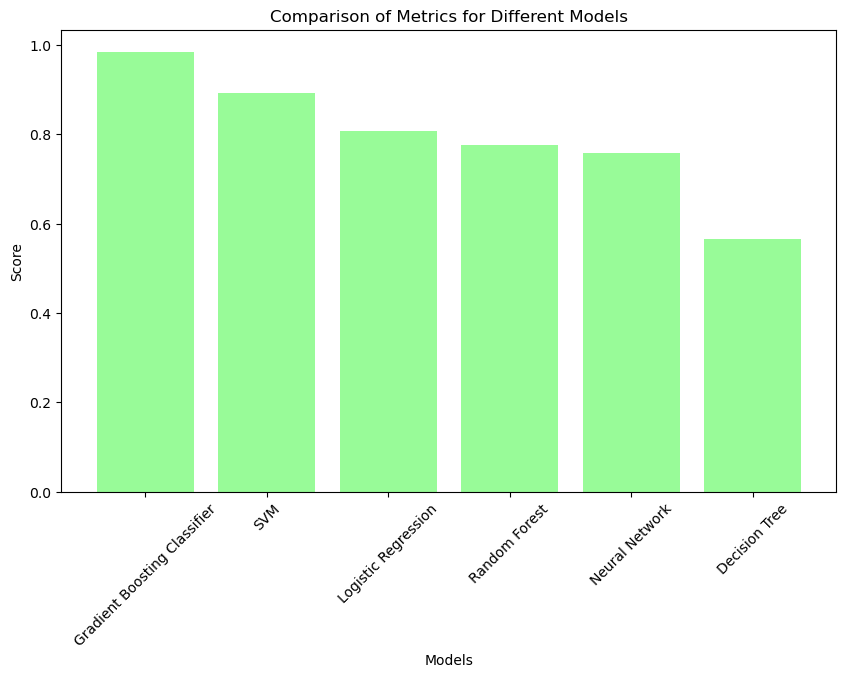

In [288]:
# Plotting the metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics.Model, metrics['Recall'], color='palegreen', label='Recall')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Comparison of Metrics for Different Models')
plt.xticks(rotation=45)

plt.show()


### Create a risk column 

In [276]:
def assign_risk_category(label):
    if label < 0.6:
        return 'Low-risk'
    elif 0.6 <= label <= 0.8:
        return 'Medium-risk'
    else:
        return 'High-risk'

In [277]:


# Apply the function to create the 'Risk Category' column
df_prob['Risk Category'] = df_prob['Class 1'].apply(assign_risk_category)

# Print the DataFrame with the newly added 'Risk Category' column
print(df_prob)


      Class 1 Risk Category
0    0.944448     High-risk
1    0.971612     High-risk
2    0.111609      Low-risk
3    0.988373     High-risk
4    0.028596      Low-risk
..        ...           ...
982  0.002857      Low-risk
983  0.260825      Low-risk
984  0.979490     High-risk
985  0.977180     High-risk
986  0.010525      Low-risk

[987 rows x 2 columns]


In [278]:
df_prob.value_counts(['Risk Category'])

Risk Category
High-risk        489
Low-risk         443
Medium-risk       55
dtype: int64

In [279]:
import pickle

In [280]:
# Save the trained model as a pickle string
saved_model = pickle.dumps(gb_model)

# Load the pickled model
loaded_gb_model = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
p = loaded_gb_model.predict(x_test)